# Credit EDA Case Study

In [44]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)

# Reading previous_application.csv

In [3]:
prev_data = pd.read_csv("previous_application.csv")
prev_data.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
prev_data.shape

(1670214, 37)

In [5]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Cleaning data by dropping unwanted rows and columns

In [6]:
prev_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [7]:
# listing the null values columns having more than 25% i.e 1/4th of the data in a column

col_empty = prev_data.isnull().sum()
print(len(col_empty))
col_empty_1 = col_empty[col_empty.values>(0.22*prev_data.shape[0])]
len(col_empty_1)

37


14

There are 11 columns which has more than 30% missing data 

In [8]:
col_empty_1.index

Index(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [9]:
# For proper analysis we shall get rid of these columns to avoid improper insights

col_empty_list = list(col_empty_1.index)
prev_data.drop(labels=col_empty_list,axis=1,inplace=True)


In [10]:
#checking the shape again for clarity
prev_data.shape

(1670214, 23)

In [11]:
# Checking columns with less null perecentage
prev_data.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [12]:
prev_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [13]:
prev_data.PRODUCT_COMBINATION.fillna('NA' , inplace = True)

In [14]:
prev_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
NA                                   346
Name: PRODUCT_COMBINATION, dtype: int64

In [15]:
prev_data.AMT_CREDIT.fillna(prev_data.AMT_CREDIT.median() , inplace = True)

In [16]:
prev_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [17]:
prev_data.shape

(1670214, 23)

In [18]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670214 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [19]:
### Trying to find correlation between the numeric values 

In [20]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.752339e+05,1.961140e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02
std,5.325980e+05,1.028148e+05,2.927798e+05,3.185745e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00
25%,1.461857e+06,1.893290e+05,1.872000e+04,2.416050e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00
50%,1.923110e+06,2.787145e+05,7.104600e+04,8.054100e+04,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00
75%,2.384280e+06,3.675140e+05,1.803600e+05,2.164185e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01
max,2.845382e+06,4.562550e+05,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06


In [22]:
prev_data.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [24]:
Approved = prev_data[prev_data.NAME_CONTRACT_STATUS=='Approved']
Canceled = prev_data[prev_data.NAME_CONTRACT_STATUS=='Canceled']
Refused = prev_data[prev_data.NAME_CONTRACT_STATUS=='Approved']
Unused_offer = prev_data[prev_data.NAME_CONTRACT_STATUS=='Unused offer']

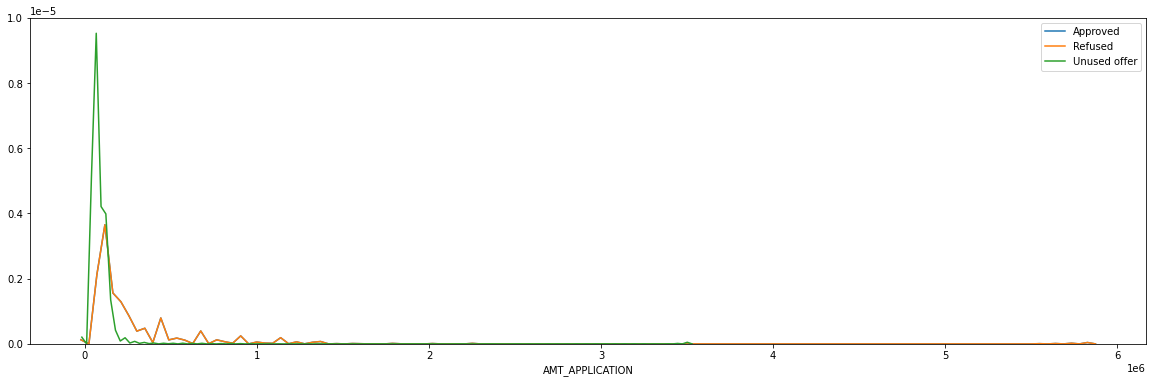

In [29]:
plt.figure(figsize=(20,6))
sns.distplot(Approved.AMT_APPLICATION,hist=False,label='Approved')
# sns.distplot(Canceled.AMT_APPLICATION,hist=False,label='Canceled')
sns.distplot(Refused.AMT_APPLICATION,hist=False,label='Refused')
sns.distplot(Unused_offer.AMT_APPLICATION,hist=False,label='Unused offer')
plt.show()

In [45]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


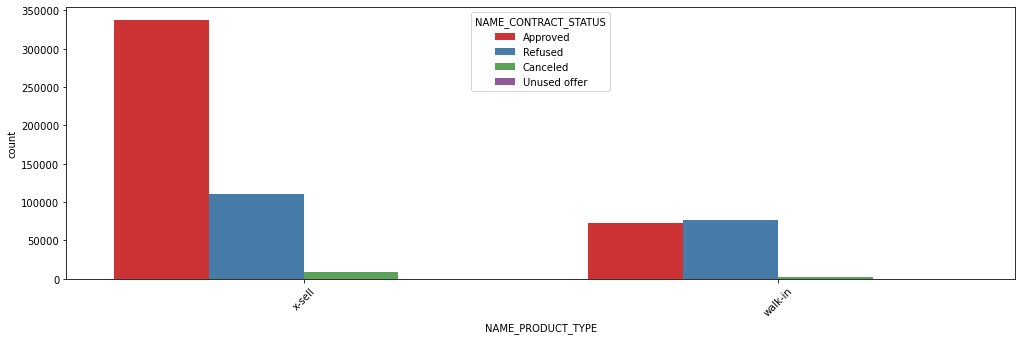

In [86]:
plt.figure(figsize=(17,5))
NAME_PRODUCT_TYPE = prev_data[~prev_data.NAME_PRODUCT_TYPE.isin( ['XAP','XNA'])]
PRODUCT_TYPE_PLT = sns.countplot(x='NAME_PRODUCT_TYPE',hue='NAME_CONTRACT_STATUS',data=NAME_PRODUCT_TYPE,palette='Set1')
PRODUCT_TYPE_PLT.set_xticklabels(PRODUCT_TYPE_PLT.get_xticklabels(), rotation=45)
plt.show()

#### NAME_CLIENT_TYPE


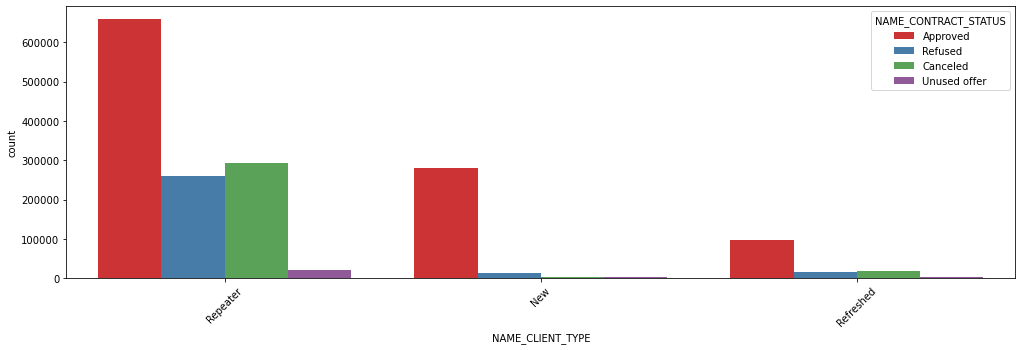

In [85]:
plt.figure(figsize=(17,5))
NAME_CLIENT_TYPE = prev_data[~prev_data.NAME_CLIENT_TYPE.isin( ['XAP','XNA'])]
CLIENT_TYPE_PLT = sns.countplot(x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS',data=NAME_CLIENT_TYPE,palette='Set1')
CLIENT_TYPE_PLT.set_xticklabels(CLIENT_TYPE_PLT.get_xticklabels(), rotation=45)
plt.show()

#### NAME_CASH_LOAN_PURPOSE

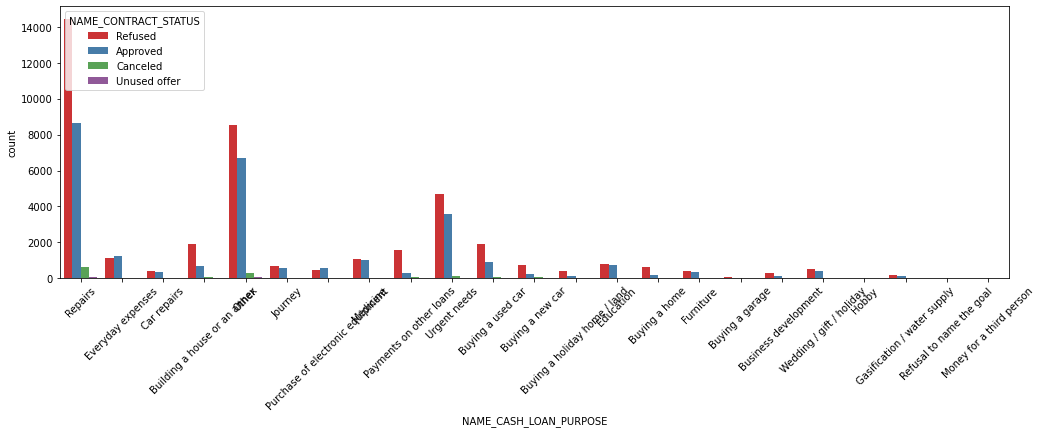

In [84]:
plt.figure(figsize=(17,5))
NAME_CASH_LOAN_PURPOSE = prev_data[~prev_data.NAME_CASH_LOAN_PURPOSE.isin( ['XAP','XNA'])]
pur_plt = sns.countplot(x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',data=NAME_CASH_LOAN_PURPOSE,palette='Set1')
pur_plt.set_xticklabels(pur_plt.get_xticklabels(), rotation=45)
plt.show()

#### NAME_PAYMENT_TYPE 

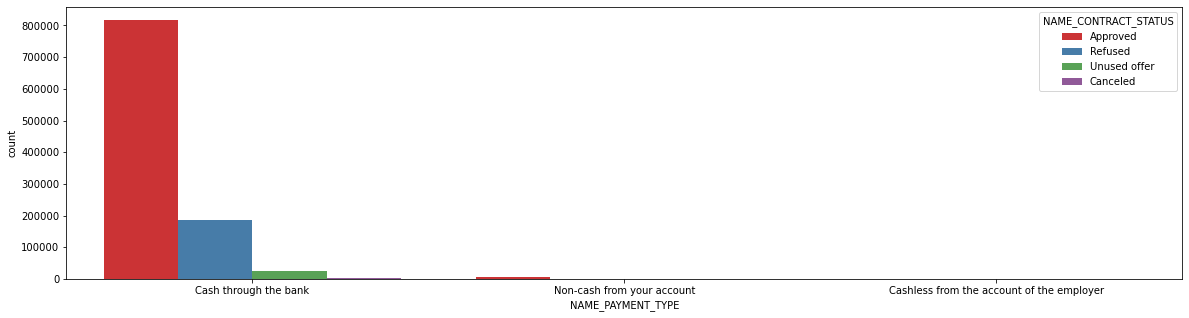

In [55]:
plt.figure(figsize=(20,5))
NAME_PAYMENT_TYPE = prev_data[prev_data.NAME_PAYMENT_TYPE!='XNA']
sns.countplot(x='NAME_PAYMENT_TYPE',hue='NAME_CONTRACT_STATUS',data=NAME_PAYMENT_TYPE,palette='Set1')


#### WEEKDAY_APPR_PROCESS_START

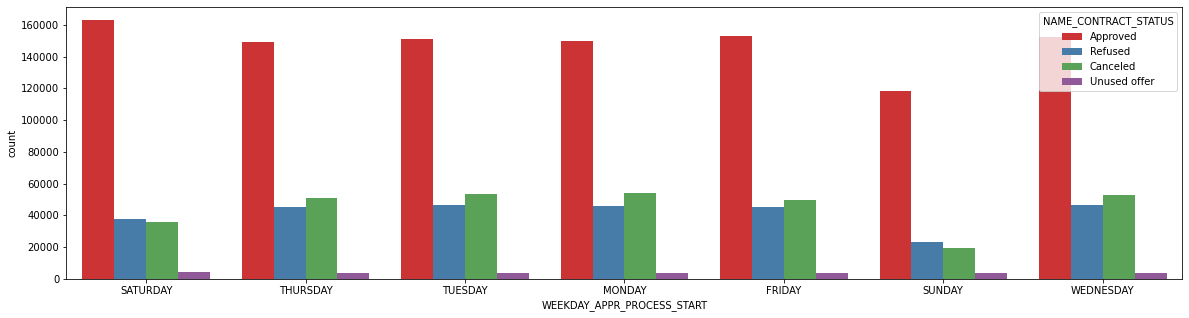

In [57]:
plt.figure(figsize=(20,5))
WEEKDAY_APPR_PROCESS_START = prev_data[prev_data.WEEKDAY_APPR_PROCESS_START!='XNA']
sns.countplot(x='WEEKDAY_APPR_PROCESS_START',hue='NAME_CONTRACT_STATUS',data=WEEKDAY_APPR_PROCESS_START,palette='Set1')

#### NAME_CONTRACT_TYPE

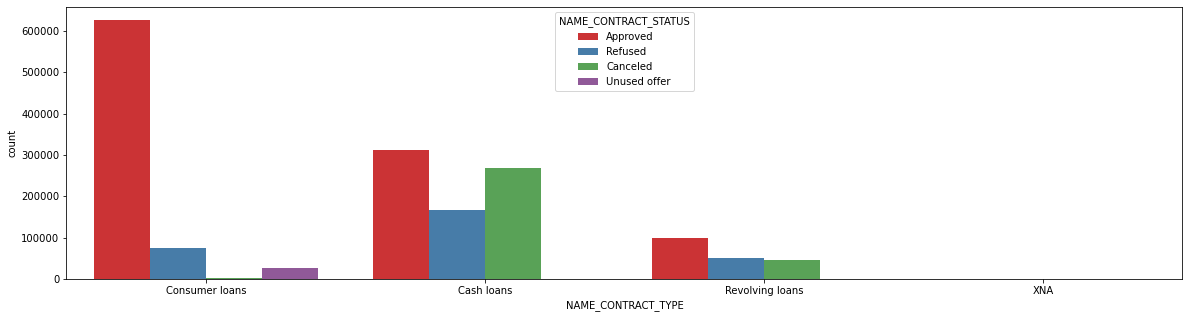

In [58]:
plt.figure(figsize=(20,5))
NAME_CONTRACT_TYPE = prev_data[prev_data.NAME_CONTRACT_TYPE!='XNA']
sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',data=WEEKDAY_APPR_PROCESS_START,palette='Set1')

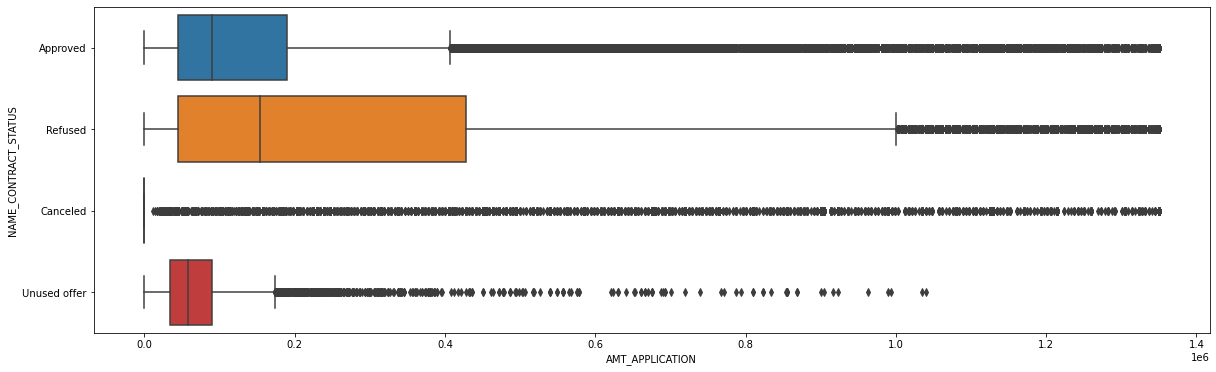

In [42]:
plt.figure(figsize=(20,6))
amt_application =  prev_data[prev_data.AMT_APPLICATION<=prev_data.AMT_APPLICATION.quantile(0.99)]
sns.boxplot(x='AMT_APPLICATION',y='NAME_CONTRACT_STATUS',data=amt_application)

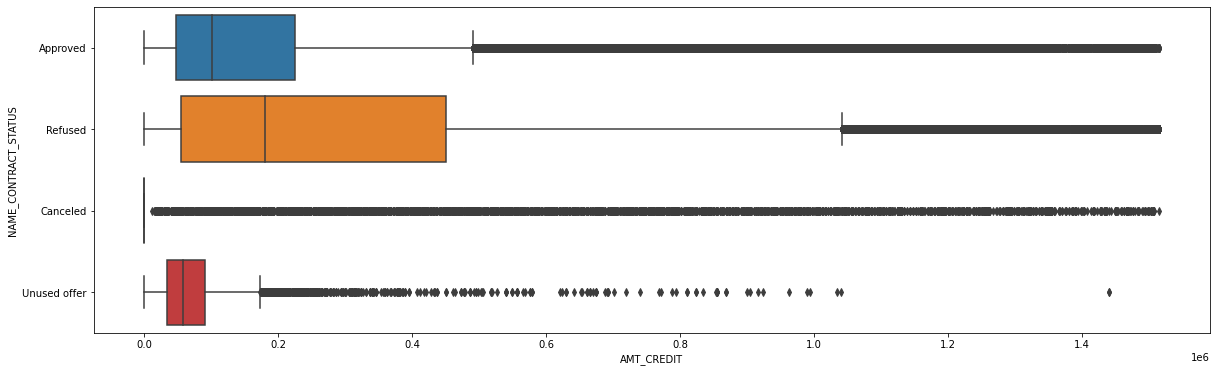

In [43]:
plt.figure(figsize=(20,6))
amt_credit =  prev_data[prev_data.AMT_CREDIT<=prev_data.AMT_CREDIT.quantile(0.99)]
sns.boxplot(x='AMT_CREDIT',y='NAME_CONTRACT_STATUS',data=amt_credit)